In [15]:
from easydict import EasyDict as edict
import matplotlib.pyplot as plt
import skimage.transform
import numpy as np
import torch
import os

from main_monodepth_pytorch import Model
%reload_ext autoreload
%autoreload 2

In [16]:
torch.cuda.is_available()

True

In [17]:
torch.cuda.empty_cache()

In [18]:
dict_parameters = edict({'data_dir':'../../2011_09_26/',
                         'model_path':'../../2011_09_26/2011_09_26_drive_0001_sync/Models/model.pth',
                         'output_directory':'../../2011_09_26/2011_09_26_drive_0001_sync/Models/',
                         'input_height':256,
                         'input_width':512,
                         'model':'resnet18_md',
                         'mode':'train',
                         'epochs':2,
                         'learning_rate':1e-3,
                         'batch_size':5,
                         'adjust_lr':True,
                         'tensor_type':'torch.cuda.FloatTensor',
                         'do_augmentation':True,
                         'augment_parameters':[0.8, 1.2, 0.5, 2.0, 0.8, 1.2],
                         'print_images':False,
                         'print_weights':False})

In [19]:
model = Model(dict_parameters)
# model.load('data/models/monodepth_006_02_cpt.pth')

Use a dataset with 216 images


In [20]:
model.train()

/home/roman/.pyenv/versions/3.6.5/envs/general/lib/python3.6/site-packages/torch/nn/functional.py:1749: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


Epoch: 1 loss: 3.3163664352010795 time: 18.685 s
Model_saved
Epoch: 2 loss: 3.1751140731352345 time: 18.858 s
Model_saved
Finished Training. Best loss: 3.1751140731352345


In [12]:
dict_parameters_test = edict({'data_dir':'../../2011_09_26/2011_09_26_drive_0001_sync/test',
                         'model_path':'../../2011_09_26/2011_09_26_drive_0001_sync/Models/model.pth',
                         'output_directory':'../../2011_09_26/2011_09_26_drive_0001_sync/Models/',
                        'input_height':256,
                        'input_width':512,
                        'model':'resnet18_md',
                        'mode':'test',
                        'tensor_type':'torch.FloatTensor'})

In [13]:
model_test = Model(dict_parameters_test)

In [14]:
model_test.test()

Finished Testing


In [12]:
disp_pp = np.load('../2011_09_26/2011_09_26_drive_0001_sync/Models/disparities.npy')

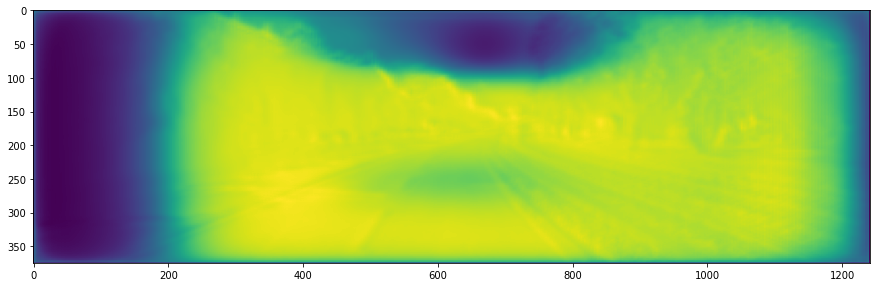

In [15]:
disp_to_img = skimage.transform.resize(disp_pp[-1].squeeze(), [375, 1242], mode='constant')
plt.imshow(disp_to_img)

In [16]:
plt.imsave(os.path.join(dict_parameters_test.output_directory,
                        dict_parameters_test.model_path.split('/')[-1][:-4]+'.png'), disp_to_img, cmap='plasma')

In [17]:
plt.imsave(os.path.join(dict_parameters_test.output_directory,
                        dict_parameters_test.model_path.split('/')[-1][:-4]+'gray.png'), disp_to_img, cmap='gray')